
## USA Financial Consumer Complaints EDA


1. Data Loading  
2. Data Understanding  
3. Data Cleaning  
4. Missing Value Analysis  
5. Duplicate Check  
6. Univariate Analysis  
7. Bivariate Analysis  
8. Time Trend Analysis  
9. Business Insights  

---


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


## 1️⃣ Load Dataset

In [4]:

df = pd.read_csv(r"/content/consumer_complaints.csv",low_memory=False)
df.head()


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


## 2️⃣ Dataset Overview

In [5]:

print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns)


Dataset Shape: (555957, 18)

Columns:
Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

## 3️⃣ Missing Value Analysis

In [7]:

missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


,0
consumer_complaint_narrative,489151
tags,477998
company_public_response,470833
consumer_consent_provided,432499
sub_issue,343335
sub_product,158322
state,4887
zipcode,4505


## 4️⃣ Duplicate Records

In [8]:

print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


## 5️⃣ Date Conversion

In [10]:
if 'date_received' in df.columns:
    df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')

if 'date_sent_to_company' in df.columns:
    df['date_sent_to_company'] = pd.to_datetime(df['date_sent_to_company'], errors='coerce')

df[['date_received']].head()

,date_received
0,2013-08-30
1,2013-08-30
2,2013-08-30
3,2013-08-30
4,2013-08-30


## 6️⃣ Top 10 Products with Most Complaints

product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Name: count, dtype: int64


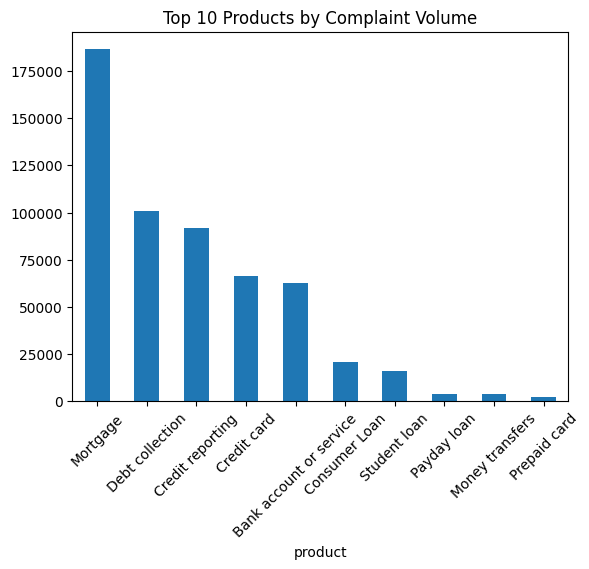

In [21]:
if 'product' in df.columns:
    product_counts = df['product'].value_counts().head(10)
    print(product_counts)

    plt.figure()
    product_counts.plot(kind='bar')
    plt.title("Top 10 Products by Complaint Volume")
    plt.xticks(rotation=45)
    plt.show()

## 7️⃣ Top 10 Companies with Most Complaints

company
Bank of America                           55998
Wells Fargo & Company                     42024
JPMorgan Chase & Co.                      33881
Equifax                                   31828
Experian                                  30905
Citibank                                  25540
TransUnion Intermediate Holdings, Inc.    25534
Ocwen                                     20978
Capital One                               15628
Nationstar Mortgage                       13250
Name: count, dtype: int64


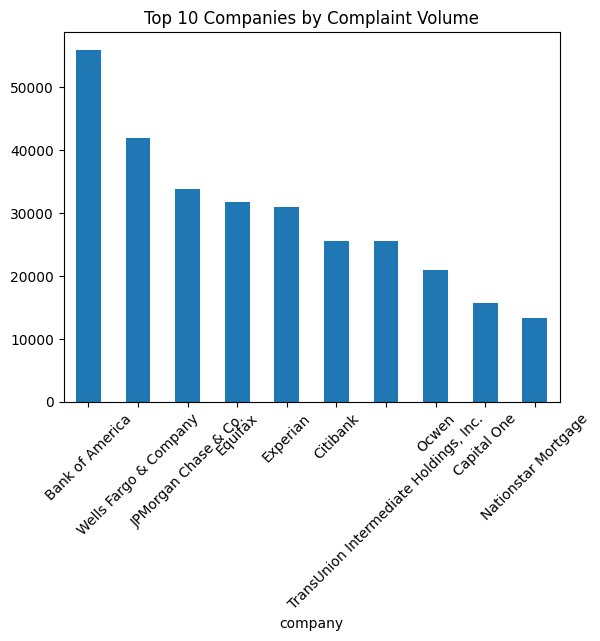

In [22]:

if 'company' in df.columns:
    company_counts = df['company'].value_counts().head(10)
    print(company_counts)

    plt.figure()
    company_counts.plot(kind='bar')
    plt.title("Top 10 Companies by Complaint Volume")
    plt.xticks(rotation=45)
    plt.show()


## 8️⃣ Top 10 States by Complaints

state
CA    81700
FL    53673
TX    41352
NY    38266
GA    24548
NJ    22408
PA    20015
IL    19624
VA    18150
MD    17703
Name: count, dtype: int64


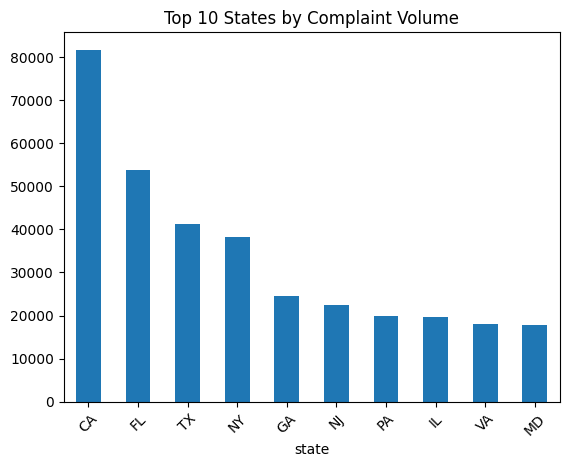

In [23]:

if 'state' in df.columns:
    state_counts = df['state'].value_counts().head(10)
    print(state_counts)

    plt.figure()
    state_counts.plot(kind='bar')
    plt.title("Top 10 States by Complaint Volume")
    plt.xticks(rotation=45)
    plt.show()


## 9️⃣ Timely Response Distribution

timely_response
Yes    541909
No      14048
Name: count, dtype: int64


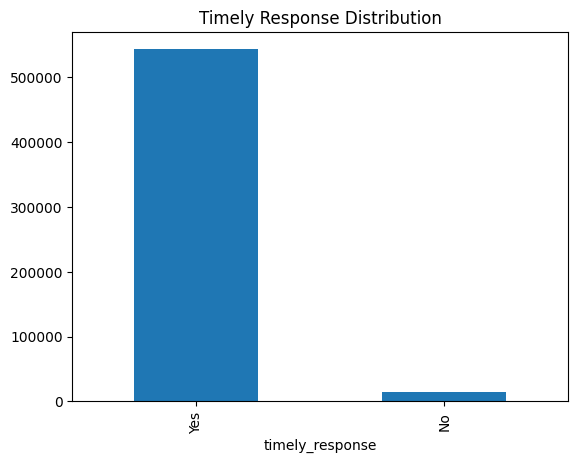

In [25]:

if 'timely_response' in df.columns:
    timely_counts = df['timely_response'].value_counts()
    print(timely_counts)

    plt.figure()
    timely_counts.plot(kind='bar')
    plt.title("Timely Response Distribution")
    plt.show()


## 🔟 Consumer Dispute Analysis

consumer_disputed?
No     443823
Yes    112134
Name: count, dtype: int64


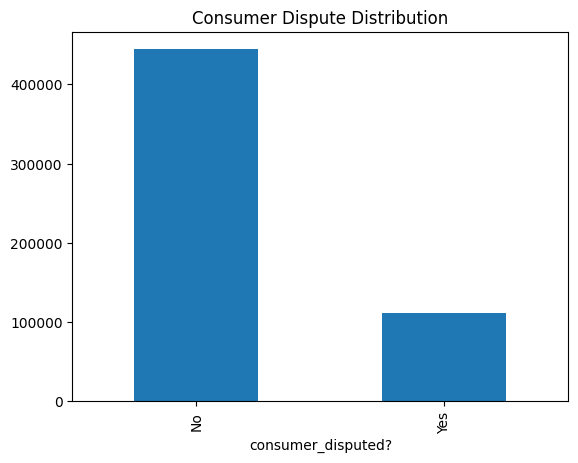

In [26]:

if 'consumer_disputed?' in df.columns:
    dispute_counts = df['consumer_disputed?'].value_counts()
    print(dispute_counts)

    plt.figure()
    dispute_counts.plot(kind='bar')
    plt.title("Consumer Dispute Distribution")
    plt.show()


## 1️⃣1️⃣ Monthly Complaint Trend

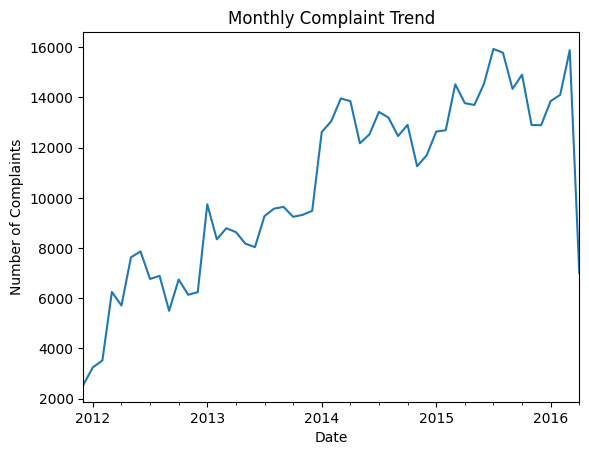

In [27]:

if 'date_received' in df.columns:
    monthly_trend = df.groupby(df['date_received'].dt.to_period('M')).size()
    monthly_trend.index = monthly_trend.index.to_timestamp()

    plt.figure()
    monthly_trend.plot()
    plt.title("Monthly Complaint Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Complaints")
    plt.show()



## 📌 Key Business Insights

• Certain financial products consistently receive high complaint volumes.  
• A small group of companies account for a large share of complaints.  
• Complaint concentration varies significantly by state.  
• Most companies respond to complaints in a timely manner.  
• Complaint trends show fluctuations over time, indicating possible regulatory or economic impacts.  

---
### ✅ End of EDA Report
